1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

x1 = np.random.normal(loc = 0, scale = 1, size = 1000)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = 1000)
x3 = 2*x1 + x2

data = np.array([x1, x2, x3])
print('A =', data)

## Covariance matrix ##
print('\n!!! Covariance matrix !!!')
cov_matrix = np.cov(data, bias=True)

l, V = la.eig(cov_matrix)
real_l = np.real_if_close(l)
print("real(eigenvalues):\n",real_l , '\n')
# V is the matrix of the eigenvectors
print("Eigenvectors:\n", V, '\n')

## SVD ##
print('\n!!! SVD !!!')
U, s, Vt = la.svd(data)
print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Square root of the eigenvalues of  𝐴.T*𝐴:\n", s, '\n')
print("Eigenvectors of A*A.T:\n", U, '\n')
print("Eigenvectors of A.T*A:\n", Vt, '\n')

# Rescale the SVD spectrum to get the eigenvalues
n = 1000
l_svd = s**2/(n-1)
# The matrix U already contains the eigenvectors
V_svd = U

# Compare Eigenvalues
print('! Compare Eigenvalue ! \n')
print("Eigendecomposition:\n", real_l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print('\n! Compare Eigenvectors ! \n')
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

# We observe that U has the same values of V using the covariance matrix but not in the same order 
# (the 2nd and 3rd column are inversed).


A = [[ 0.95921028 -0.6541796   0.91260355 ...  0.80413424 -0.24455817
  -0.74698247]
 [ 1.12248258  2.50676738  3.72387847 ...  3.18421906 -2.33294324
  -2.95474911]
 [ 3.04090315  1.19840818  5.54908557 ...  4.79248754 -2.82205957
  -4.44871405]]

!!! Covariance matrix !!!
real(eigenvalues):
 [ 2.78827156e+01 -7.31239879e-16  2.09572090e+00] 

Eigenvectors:
 [[-0.11556608 -0.81649658  0.56566582]
 [-0.57723023 -0.40824829 -0.70720478]
 [-0.80836239  0.40824829  0.42412685]] 


!!! SVD !!!
shapes: U = (3, 3) S: (3,) V^T: (1000, 1000) 

Square root of the eigenvalues of  𝐴.T*𝐴:
 [1.67005929e+02 4.58162025e+01 7.08500832e-15] 

Eigenvectors of A*A.T:
 [[-0.11568241  0.56564204 -0.81649658]
 [-0.57708477 -0.70732347 -0.40824829]
 [-0.80844959  0.4239606   0.40824829]] 

Eigenvectors of A.T*A:
 [[-1.92636770e-02 -1.40102380e-02 -4.03621701e-02 ... -3.47596828e-02
   2.18919773e-02  3.22630133e-02]
 [ 2.26521283e-02 -3.56871356e-02  5.12512837e-03 ...  5.11620603e-03
   6.88339607e-03 -4.77

In [2]:
# percentage of variability
Lambda = np.diag(real_l)
print("Lambda:\n", Lambda, '\n')
print("Trace(cov_matrix):\n", cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()))
# We can remove the 2nd component as it doesn't retain any percentage of the overall variability. 
#data = np.array([x1, x3])

Lambda:
 [[ 2.78827156e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.31239879e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.09572090e+00]] 

Trace(cov_matrix):
 29.978436513948438 

Trace(Lambda):
 29.978436513948456 

By selecting the component 0, we retain 0.93% of the total variability
By selecting the component 1, we retain -0.00% of the total variability
By selecting the component 2, we retain 0.07% of the total variability


Eigenvalue: (27.882715611465155+0j) ,	eigenvector: [-0.11556608 -0.57723023 -0.80836239]
Eigenvalue: (-7.312398785581196e-16+0j) ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: (2.0957209024832992+0j) ,	eigenvector: [ 0.56566582 -0.70720478  0.42412685]
Eigenvalue: (27.882715611465155+0j) ,	eigenvector: [ 1.00000000e+00 -5.97744901e-17  7.17377376e-17]
Eigenvalue: (-7.312398785581196e-16+0j) ,	eigenvector: [-5.97744901e-17  1.00000000e+00  9.29561695e-16]
Eigenvalue: (2.0957209024832992+0j) ,	eigenvector: [7.17377376e-17 9.29561695e-16 1.00000000e+00]


/Users/anais/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


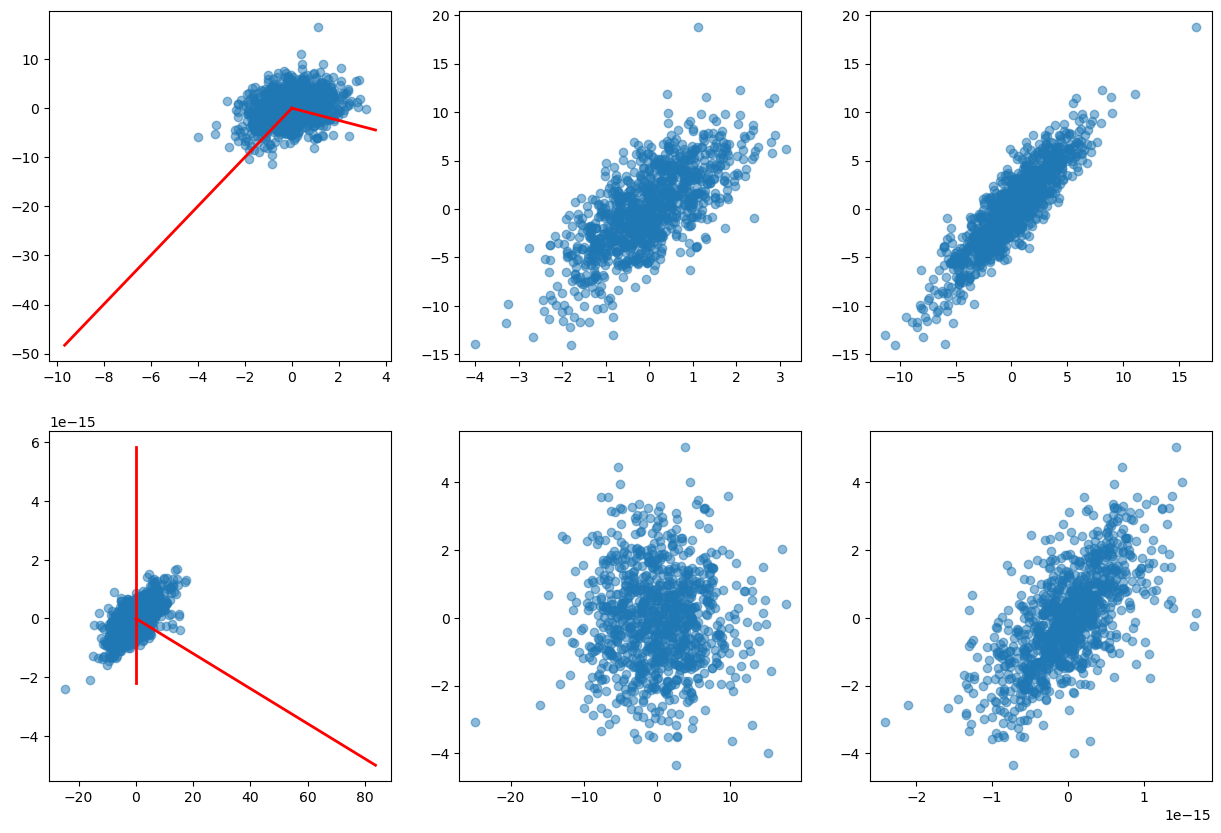

In [3]:
# Let's now take the eigenvectors as new basis vectors and redefine the data points w.r.t. this new basis.
data_new = np.dot(V.T, data)

fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))

#plot original:

# the original data distribution
ax1.scatter(data[0,:], data[1,:], alpha=0.5)
ax2.scatter(data[0,:], data[2,:], alpha=0.5)
ax3.scatter(data[1,:], data[2,:], alpha=0.5)

# the new basis data distribution
ax4.scatter(data_new[0,:], data_new[1,:], alpha=0.5)
ax5.scatter(data_new[0,:], data_new[2,:], alpha=0.5)
ax6.scatter(data_new[1,:], data_new[2,:], alpha=0.5)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    #ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    #ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)


for li, vi in zip(l,np.dot(V.T,V)):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax4.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    #ax5.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    #ax6.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

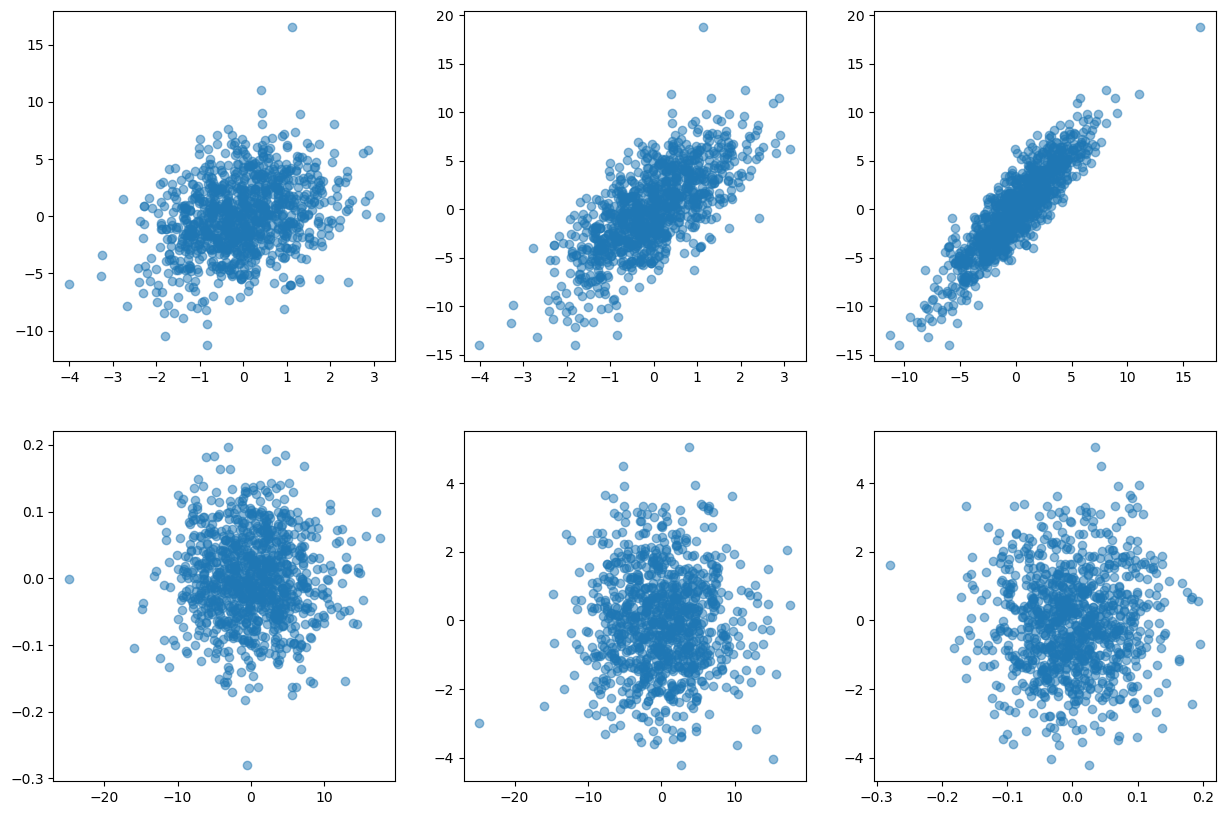

In [4]:
# factor of 20 : 1,2,4,5,10,20
noise = np.random.normal(loc = 0, scale = 1/50, size=(3,1000,10))
noise_data = data +np.sum(noise, axis=2)

U, s, Vt = la.svd(noise_data)
data_new = np.dot(V.T, noise_data)
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))

#plot original:

# the original data distribution
ax1.scatter(data[0,:], data[1,:], alpha=0.5)
ax2.scatter(data[0,:], data[2,:], alpha=0.5)
ax3.scatter(data[1,:], data[2,:], alpha=0.5)

# the new basis data distribution
ax4.scatter(data_new[0,:], data_new[1,:], alpha=0.5)
ax5.scatter(data_new[0,:], data_new[2,:], alpha=0.5)
ax6.scatter(data_new[1,:], data_new[2,:], alpha=0.5)

# We can see that before PCA, the plots are similar (because the noise is really small) so we don't see effects on the data point cloud
# After PCA, we have a difference on the plots. Indeed, our plots are less narrow than without noise. It makes sense 
# because with noise around the data points, it has more difficulties to 

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-10 18:41:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: 'data/magic04.data.1'

magic04.data.1      100%[===================>]   1.41M  1.17MB/s    in 1.2s    

2023-01-10 18:41:12 (1.17 MB/s) - 'data/magic04.data.1' saved [1477391/1477391]

--2023-01-10 18:41:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: 'data/magic04.names.1'

magic04.names.1     100%[===================>]   5.27K 